In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
root = '/home/turnyur/sommer-sem-2024/CV/Exercises/'
res_00 = '00/exercise_0_introduction/resources'

file = 'umah.jpeg'  ## path to the image
input_path = os.path.join(root, res_00, file)
img = cv2.imread(input_path, cv2.IMREAD_COLOR)
img_array = np.array(img) 

In [3]:
img_array.shape

(390, 302, 3)

In [4]:
blue_c, green_c, red_c = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]

In [5]:
print(type(blue_c))

<class 'numpy.ndarray'>


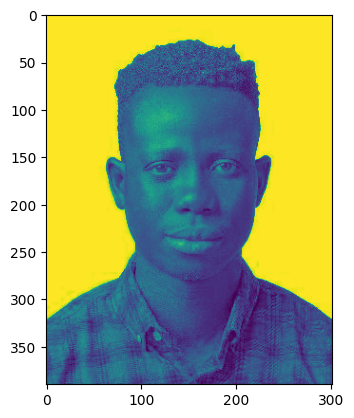

In [6]:
plt.imshow(blue_c)

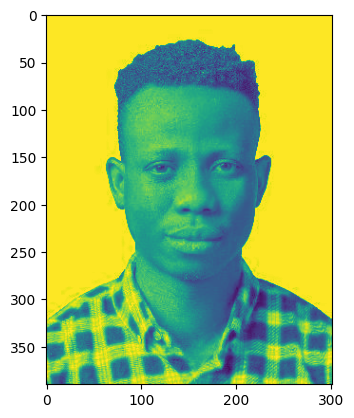

In [7]:
plt.imshow(red_c)

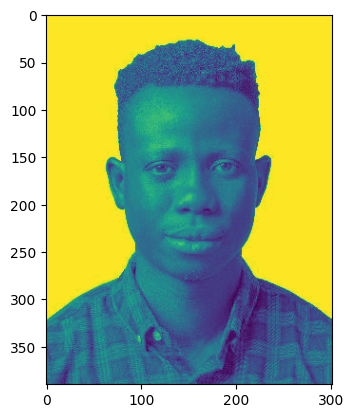

In [8]:
plt.imshow(green_c)

In [9]:
factor = 9
box_filter = np.array([[1,1,1],[1,1,1],[1,1,1]])/factor

In [10]:
box_filter.shape

(3, 3)

In [11]:
box_filter

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

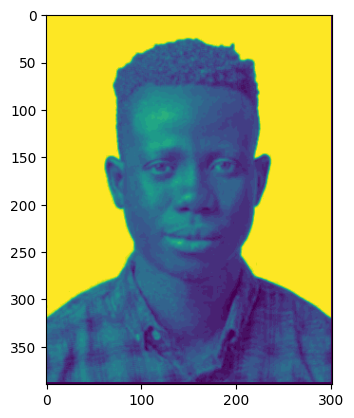

In [12]:
factor = 100
box_filter = np.array([[1,1,1],[1,1,1],[1,1,1]])/factor
filter_size = box_filter.shape[0]
convolved_image = np.zeros_like(blue_c)
for i in range(blue_c.shape[0]-filter_size + 1):
    for j in range(blue_c.shape[1]- filter_size+1):
        region = blue_c[i:i+filter_size,j:j+filter_size]
        convolved_image[i,j] = np.sum(region * box_filter)

plt.imshow(convolved_image)               

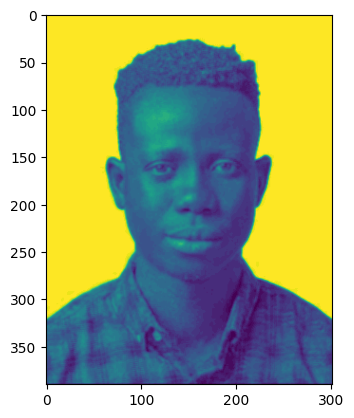

In [13]:
factor = 70
f_size = (3,3)
box_filter = np.array(np.ones(f_size))/factor
filter_size = box_filter.shape[0]
pad_size = 1
blue_c_padded = np.pad(blue_c, pad_size, mode='constant', constant_values=0)
convolved_image = np.zeros_like(blue_c)
for i in range(blue_c.shape[0]):
    for j in range(blue_c.shape[1]):
        region = blue_c_padded[i:i+filter_size,j:j+filter_size]
        convolved_image[i,j] = np.sum(region * box_filter)

plt.imshow(convolved_image)   

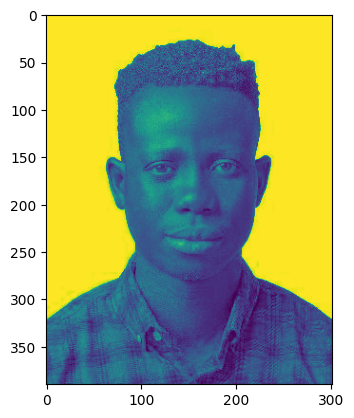

In [14]:
plt.imshow(blue_c)

In [15]:
# Left Vacant

In [16]:
# Exercise 01 -> Feature Detection

# Harris Corner Detection
import cv2

root = '/home/turnyur/sommer-sem-2024/CV/Exercises/'
res_01 = '01/exercise_1_feature_detection/resources'

file = 'input.jpg'  ## path to the image
input_path = os.path.join(root, res_01, file)
I = np.array(cv2.imread(input_path, cv2.IMREAD_COLOR))
#print(I.dtype)
assert I.dtype == np.uint8
#Step 1: Compute Idx and Idy with cv2.Sobel
Idx = cv2.Sobel(I, cv2.CV_8U, 1, 0, ksize=3)
Idy = cv2.Sobel(I, cv2.CV_8U, 0,1, ksize=3)

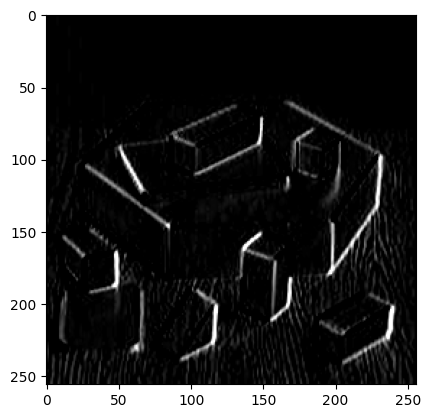

In [17]:
plt.imshow(Idx, cmap='gray')

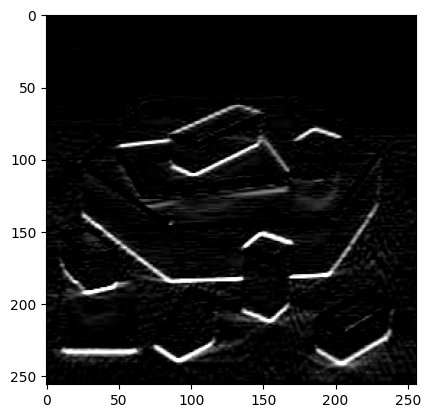

In [18]:
plt.imshow(Idy, cmap='gray')

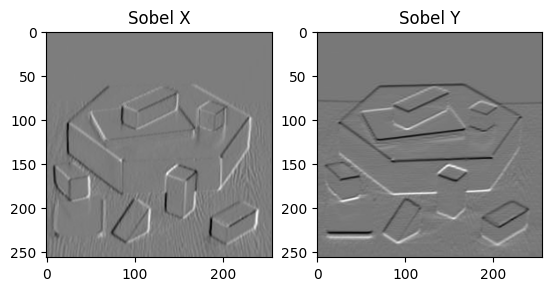

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Compute Sobel gradients in 64F to capture negative values
Idx = cv2.Sobel(I, cv2.CV_64F, 1, 0, ksize=3)
Idy = cv2.Sobel(I, cv2.CV_64F, 0, 1, ksize=3)

# Normalize and shift the values to [0, 255]
Idx_normalized = cv2.normalize(Idx, None, 0, 255, cv2.NORM_MINMAX)
Idy_normalized = cv2.normalize(Idy, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8 for displaying
Idx_normalized = np.uint8(Idx_normalized)
Idy_normalized = np.uint8(Idy_normalized)

# Display the result
plt.subplot(1, 2, 1)
plt.title('Sobel X')
plt.imshow(Idx_normalized, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Sobel Y')
plt.imshow(Idy_normalized, cmap='gray')

plt.show()


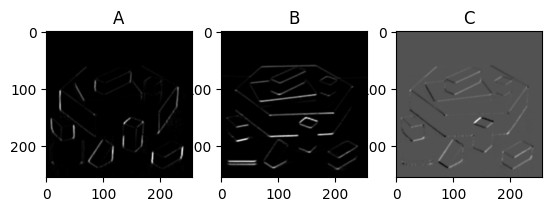

In [20]:



# Step 2: Ixx Iyy Ixy from Idx and Idy
Ixx = pow(Idx, 2)
Iyy = pow(Idy, 2)
Ixy = Idx * Idy

sdev = 1
kernelSize = (3, 3)
A = cv2.GaussianBlur(Ixx, kernelSize, sdev)
B = cv2.GaussianBlur(Iyy, kernelSize, sdev)
C = cv2.GaussianBlur(Ixy, kernelSize, sdev)

# Normalize and shift the values to [0, 255]
Idxx_normalized = cv2.normalize(A, None, 0, 255, cv2.NORM_MINMAX)
Idyy_normalized = cv2.normalize(B, None, 0, 255, cv2.NORM_MINMAX)
Idxy_normalized = cv2.normalize(C, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8 for displaying
Idx_normalized = np.uint8(Idxx_normalized)
Idy_normalized = np.uint8(Idyy_normalized)
Idxy_normalized = np.uint8(Idxy_normalized)

# Display the result
plt.subplot(1, 3, 1)
plt.title('A')
plt.imshow(Idx_normalized, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('B')
plt.imshow(Idy_normalized, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('C')
plt.imshow(Idxy_normalized, cmap='gray')

plt.show()

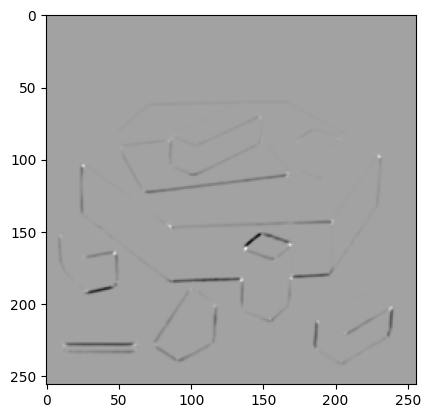

In [21]:
k = 0.06
det_T = A * B - C * C
trace_T = A + B
R = det_T - k * (trace_T**2)

R_normalized = cv2.normalize(R, None, 0, 255, cv2.NORM_MINMAX)
R_normalized = np.uint8(R_normalized)
plt.imshow(R_normalized)

In [22]:
R.shape

(256, 256, 3)

In [23]:
R[:,:,0]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.45160192e+04,  5.52542077e+04,  1.64005483e+05, ...,
        -2.21886895e+04,  8.56768491e+03, -1.97377220e+02],
       [ 8.33248082e+04,  1.18532994e+05,  2.24186436e+05, ...,
        -1.81381488e+04,  7.83727542e+03, -2.83465184e+02],
       [ 8.30521164e+04,  1.18880490e+05,  1.81718910e+05, ...,
        -1.26802894e+04,  8.30063315e+03, -4.25772376e+02]])

In [24]:
# Step 1 (recommended): Pad the response image to facilitate vectorization
#corners = []
threshold =0.1
#pad_size = 1
#k_size = 3
#R_padded = np.pad(R, pad_size, mode='constant', constant_values=0)


corners = np.zeros(R.shape[:2], dtype=bool)  # Only 2D array needed for corner detection

# Get the shape of the Harris response function
rows, cols, channels = R.shape

# Iterate over each pixel in R
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        # Check the threshold for all channels
        pixel_values = R[i, j]
        if np.all(pixel_values > threshold):
            # Extract the 3x3 neighborhood for each channel
            neighborhood = R[i-1:i+2, j-1:j+2]
            
            # Check if the current pixel is a local maximum across all channels
            if np.all(pixel_values == np.max(neighborhood, axis=(0, 1))):
                corners[i, j] = True

# Get the coordinates of the detected corners
y_coords, x_coords = np.nonzero(corners)


In [25]:
res = (y_coords, x_coords)

In [26]:
corner_values = [R[y, x] for y, x in zip(y_coords, x_coords)]

# Convert list to numpy array if needed
corner_values = np.array(corner_values)
corner_values

array([[2.34418017e+01, 2.34418017e+01, 2.34418017e+01],
       [2.34418017e+01, 2.34418017e+01, 2.34418017e+01],
       [2.34418017e+01, 2.34418017e+01, 2.34418017e+01],
       ...,
       [2.56064584e+04, 2.56064584e+04, 2.56064584e+04],
       [9.41481828e+03, 9.41481828e+03, 9.41481828e+03],
       [5.21196062e+04, 5.21196062e+04, 5.21196062e+04]])

float64


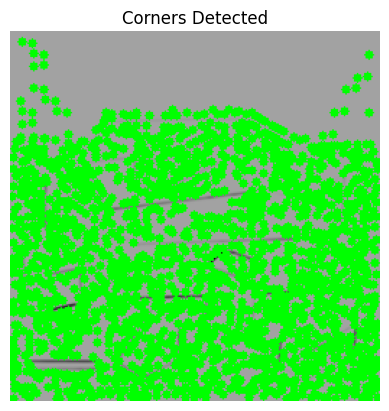

In [27]:
radius = 3
color = (0, 255, 0)  # Green in BGR format

# Create a copy of the original image
image_with_corners = R.copy()

image_with_corners = cv2.normalize(image_with_corners, None, 0, 255, cv2.NORM_MINMAX)

# Draw green dots at the detected corners
for x, y in zip(x_coords, y_coords):
    cv2.circle(image_with_corners, (x, y), radius, color, -1)  # -1 fills the circle
print(image_with_corners.dtype)
# Convert to uint8 if needed
# if image_with_corners.dtype != np.uint8:
#     image_with_corners = image_with_corners.astype(np.uint8)




# Convert to uint8 for displaying
image_with_corners = np.uint8(image_with_corners)


# Display the image with corners
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title('Corners Detected')
plt.axis('off')
plt.show()

In [28]:
# Left Vacant

In [29]:
# Exercise 02 ->  Panorama Stitching

import cv2


root = '/home/turnyur/sommer-sem-2024/CV/Exercises/'
res_02 = '02/exercise_2/resources'



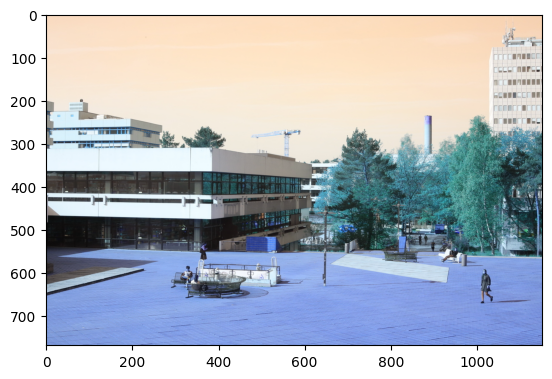

In [30]:
file = '1.jpg'  ## path to the image
input_path = os.path.join(root, res_02, file)
red_platz_img_1 = np.array(cv2.imread(input_path, cv2.IMREAD_COLOR))
plt.imshow(red_platz_img_1, cmap='gray')

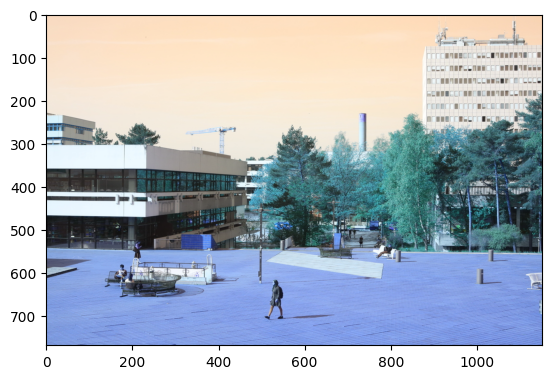

In [31]:
file = '2.jpg'  ## path to the image
input_path = os.path.join(root, res_02, file)
red_platz_img_2 = np.array(cv2.imread(input_path, cv2.IMREAD_COLOR))
plt.imshow(red_platz_img_2, cmap='gray')

In [37]:

from typing import Tuple, Dict, List

t_points = np.array
t_descriptors = np.array
t_homography = np.array
t_img = np.array
t_images = Dict[str, t_img]
t_homographies = Dict[Tuple[str, str], t_homography]  # The keys are the keys of src and destination images
t_image_list = List[np.array]
t_str_list = List[str]


def extract_features(img: t_img, num_features: int = 500) -> Tuple[t_points, t_descriptors]:
    """Extracts key-points and their descriptors.
    The OpenCV implementation of ORB is used as a backend.
    It is based on the FAST key-point detector and a modified version of the visual descriptor BRIEF (Binary Robust Independent Elementary Features).
    Its aim is to provide a fast and efficient alternative to SIFT.

    Args:
        img: a numpy array of [H x W x 3] size with byte values.
        num_features: an integer signifying how many points we desire.
    
    Returns:
        A tuple containing a numpy array of [N x 2] and numpy array of [N x 32]
    """
    #TODO : Hint - you will need cv2.ORB_create
    if len(img.shape)==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray_img = img


    orb = cv2.ORB_create(nfeatures=num_features)
    keypoints, descriptors = orb.detectAndCompute(gray_img, None)
    keypoints_array = np.array([kp.pt for kp in keypoints])
    
    return keypoints_array, descriptors

keypoints, descriptors = extract_features(red_platz_img_1, 500)

In [38]:
keypoints

array([[ 328.        ,  603.        ],
       [1041.        ,  531.        ],
       [1099.        ,  457.        ],
       [ 696.        ,  532.        ],
       [ 314.        ,  430.        ],
       [ 821.        ,  495.        ],
       [ 329.        ,  605.        ],
       [ 102.        ,  434.        ],
       [  92.        ,  278.        ],
       [  84.        ,  201.        ],
       [ 131.        ,  434.        ],
       [  80.        ,  203.        ],
       [ 648.        ,  526.        ],
       [ 931.        ,  546.        ],
       [ 950.        ,  547.        ],
       [ 821.        ,  490.        ],
       [ 413.        ,  288.        ],
       [ 591.        ,  524.        ],
       [  50.        ,  411.        ],
       [1066.        ,  434.        ],
       [ 534.        ,  551.        ],
       [ 617.        ,  396.        ],
       [ 623.        ,  435.        ],
       [ 618.        ,  378.        ],
       [ 172.        ,  277.        ],
       [ 615.        ,  4

In [39]:
descriptors

array([[248,   8, 222, ..., 224,   4,  42],
       [147, 222,  14, ..., 129, 163, 253],
       [129, 185, 115, ..., 130,  67, 169],
       ...,
       [ 21, 181, 157, ..., 233, 131,  33],
       [ 36, 237,  88, ...,  91, 153, 146],
       [ 24, 157,  59, ...,   0, 165, 251]], dtype=uint8)

In [40]:
descriptors.shape

(500, 32)

In [41]:
descriptors[0]

array([248,   8, 222, 245,  35, 122, 117,   3, 181, 182, 102, 176, 127,
        55,   1, 219,  34, 180, 236,   0,  40, 220, 225,   8, 215, 227,
        80,  19, 162, 224,   4,  42], dtype=uint8)

In [42]:
f1 = extract_features(red_platz_img_1, 500)
f2 = extract_features(red_platz_img_2, 500)

In [43]:
f1

(array([[ 328.        ,  603.        ],
        [1041.        ,  531.        ],
        [1099.        ,  457.        ],
        [ 696.        ,  532.        ],
        [ 314.        ,  430.        ],
        [ 821.        ,  495.        ],
        [ 329.        ,  605.        ],
        [ 102.        ,  434.        ],
        [  92.        ,  278.        ],
        [  84.        ,  201.        ],
        [ 131.        ,  434.        ],
        [  80.        ,  203.        ],
        [ 648.        ,  526.        ],
        [ 931.        ,  546.        ],
        [ 950.        ,  547.        ],
        [ 821.        ,  490.        ],
        [ 413.        ,  288.        ],
        [ 591.        ,  524.        ],
        [  50.        ,  411.        ],
        [1066.        ,  434.        ],
        [ 534.        ,  551.        ],
        [ 617.        ,  396.        ],
        [ 623.        ,  435.        ],
        [ 618.        ,  378.        ],
        [ 172.        ,  277.        ],


In [44]:
# filter_and_align_descriptors

def filter_and_align_descriptors(f1: Tuple[t_points, t_descriptors], f2: Tuple[t_points, t_descriptors],
                                 similarity_threshold=.7, similarity_metric='hamming') -> Tuple[t_points, t_points]:
    """Aligns pairs of keypoints from two images.
    Aligns keypoints from two images based on descriptor similarity.
    If K points have been detected in image1 and J points have been detected in image2, the result will be to sets of N
    points representing points with similar descriptors; where N <= J and K <=points.

    Args:
        f1: A tuple of two numpy arrays with the first array having dimensions [N x 2] and the second one [N x M]. M
            representing the dimensionality of the point features. In the case of ORB features, M is 32.
        f2: A tuple of two numpy arrays with the first array having dimensions [J x 2] and the second one [J x M]. M
            representing the dimensionality of the point features. In the case of ORB features, M is 32.
        similarity_threshold: The ratio the distance of most similar descriptor in image2 to the distance of the second
            most similar ratio.
        similarity_metric: A string with the name of the metric by witch distances are calculated. It must be compatible
            with the ones that are defined for scipy.spatial.distance.cdist.

    Returns:
        A tuple of numpy arrays both sized [N x 2] representing the similar point locations.

    """
    assert f1[0].shape[1] == f2[0].shape[1] == 2  # descriptor size
    assert f1[1].shape[1] == f2[1].shape[1] == 32  # points size

    # step 1: compute distance matrix (1 to 8 lines)
    keypoint1, description1 = f1
    keypoint2, description2 = f2

    if similarity_metric == 'hamming':
        dist_matrix = np.zeros((description1.shape[0], description2.shape[0]), dtype=np.float32) # NXN matrix
        
        for i in range(description1.shape[0]):
            dist_matrix[i, :] = np.sum(np.bitwise_xor(description1[i], description2) != 0, axis=1) / description1.shape[1]
        
    else:
        raise ValueError("Invalid similarity metric!")

    
    # step 2: computing the indexes of src dst so that src[src_idx,:] and dst[dst,:] refer to matching points.
    sorted_indices = np.argsort(dist_matrix, axis=1)
    best_matches = sorted_indices[:, 0]
    second_best_matches = sorted_indices[:, 1]

    # step 3: find a boolean index of the matched pairs that is true only if a match was significant.
    # A match is considered significant if the ratio of its distance to the second best is lower than a given
    # threshold.
    # Hint: use the previously computed distance matrix to find the second best match.
    distances = dist_matrix[np.arange(description1.shape[0]), best_matches]
    second_best_distances = dist_matrix[np.arange(description1.shape[0]), second_best_matches]
    ratio = distances / second_best_distances # ratio of significance
    significant_matches = ratio < similarity_threshold # Boolean of matched


    # step 4: removing non-significant matches and return the aligned points (their location only!)
    src_indices = np.arange(description1.shape[0])[significant_matches]
    dst_indices = best_matches[significant_matches]

    aligned_kp1 = keypoint1[src_indices]
    aligned_kp2 = keypoint2[dst_indices]

    return aligned_kp1, aligned_kp2


In [45]:
dist_MAT = filter_and_align_descriptors(f1,f2)
dist_MAT[0].shape

(144, 2)

In [46]:
aligned_kp1, aligned_kp2 = filter_and_align_descriptors(f1,f2)


In [47]:
dist_MAT

(array([[1041.        ,  531.        ],
        [ 314.        ,  430.        ],
        [ 648.        ,  526.        ],
        [ 617.        ,  396.        ],
        [ 623.        ,  435.        ],
        [ 618.        ,  433.        ],
        [ 593.        ,  398.        ],
        [ 963.        ,  558.        ],
        [ 935.        ,  559.        ],
        [ 382.        ,  441.        ],
        [ 816.        ,  493.        ],
        [ 953.        ,  563.        ],
        [ 221.        ,  413.        ],
        [ 923.        ,  574.        ],
        [ 618.        ,  380.        ],
        [ 320.        ,  309.        ],
        [ 618.        ,  353.        ],
        [1118.        ,  122.        ],
        [ 321.        ,  605.        ],
        [ 225.        ,  592.        ],
        [ 410.        ,  289.        ],
        [ 321.        ,  497.        ],
        [ 824.40002441,  489.6000061 ],
        [ 313.20001221,  436.80001831],
        [ 936.00006104,  558.        ],


In [48]:
sorted_indices = np.argsort(dist_MAT, axis=1)
sorted_indices

array([[[ 41,  43],
        [ 51,  17],
        [ 78,  45],
        [ 40,  31],
        [ 12,  20],
        [ 19, 133],
        [ 98, 141],
        [117,  70],
        [ 55, 122],
        [ 86,  96],
        [ 89,  76],
        [ 23,  79],
        [ 69,  69],
        [  1,  50],
        [ 76,  15],
        [ 96,  28],
        [122,  16],
        [ 79,  90],
        [ 50,  80],
        [ 15,  25],
        [ 21,  14],
        [ 18, 139],
        [134, 111],
        [120, 126],
        [104,  29],
        [140,  77],
        [116,  82],
        [ 57,  83],
        [102, 103],
        [ 39,  46],
        [ 63,  47],
        [131,  38],
        [ 44,  37],
        [ 88,   3],
        [109, 129],
        [127,  81],
        [ 71,   6],
        [ 93, 112],
        [123, 101],
        [113,  41],
        [ 94,  40],
        [ 36,  78],
        [ 54,  12],
        [114,  51],
        [130,  67],
        [138, 130],
        [128,  62],
        [ 92,  27],
        [ 66,  98],
        [ 62, 132],


In [49]:
x = np.array([4, 2, 3]) # SHows the indices, of the would-be-sorted in ascending order

In [50]:
np.argsort(x)

array([1, 2, 0])

In [51]:
best_matches = sorted_indices[:, 0]
second_best_matches = sorted_indices[:, 1]
print(best_matches) 
print(second_best_matches)

[[41 43]
 [41 43]]
[[51 17]
 [51 17]]


In [52]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [54]:
len(f1)

2

In [55]:
# Compute Homography

def compute_homography(f1: np.array, f2: np.array) -> np.array:
    """Computes the homography matrix given matching points.

    In order to define a homography a minimum of 4 points are needed but the homography can also be overdefined with 5
    or more points.

    Args:
        f1: A numpy array of size [N x 2] containing x and y coordinates of the source points.
        f2: A numpy array of size [N x 2] containing x and y coordinates of the destination points.

    Returns:
        A [3 x 3] numpy array containing normalised homography matrix.
    """
    # Homogeneous coordinates
    homography_matrix = np.zeros((3, 3))
    assert f1.shape[0] == f1.shape[0] >= 4
    N = f1.shape[0]
    
    # TODO 3
    # - Construct the (>=8) x 9 matrix A.
    A = np.zeros((2 * N, 9))
    # - Use the formula from the exercise sheet.
    for i in range(N):
        x, y = f1[i]
        x_prime, y_prime = f2[i]
        A[2*i] = [-x, -y, -1, 0, 0, 0, x*x_prime, y*x_prime, x_prime]
        A[2*i + 1] = [0, 0, 0, -x, -y, -1, x*x_prime, y*x_prime, y_prime]
    
    # - Note that every match contributes to exactly two rows of the matrix.
    # - Extract the homogeneous solution of Ah=0 as the rightmost column vector of V.
    _, _, V = np.linalg.svd(A)
    
    # - Store the result in H.
    H = V[-1].reshape(3, 3)

    #print("SHAPE: ", H)
    
    # - Normalize H
    H = H / H[2, 2]
    # Hint: No loops are needed but up to to 2 nested loops might make the solution easier.
    #print("SHAPE: ", H)

    
    return H

In [56]:
homography = compute_homography(aligned_kp1,aligned_kp2)
homography

array([[ 1.03780004e+00,  1.76226584e-02, -1.69708072e+02],
       [ 3.18395157e-02,  1.01620747e+00, -1.97168045e+01],
       [ 2.05814729e-05,  2.99954274e-05,  1.00000000e+00]])

In [57]:
A = np.zeros((2 * 4, 9))
A

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [58]:
A[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [59]:
# Implement get inliers


def _get_inlier_count(src_points: np.array, dst_points: np.array, homography: np.array,
                      distance_threshold: float) -> int:
    """Computes the number of inliers for a homography given aligned points.
    ## - Project the image points from image 1 to image 2
    ## - A point is an inlier if the distance between the projected point and
    ##      the point in image 2 is smaller than threshold.
    
    Args:
        src_points: a numpy array of [N x 2] containing source points.
        dst_points: a numpy array of [N x 2] containing destination points.
        homography: a [3 x 3] numpy array.
        distance_threshold: a float representing the norm of the difference between two points so that they will be
            considered the same (near enough).

    Returns:
        An integer counting how many transformed source points matched destination.
    """
    assert src_points.shape[1] == dst_points.shape[1] == 2
    assert src_points.shape[0] == dst_points.shape[0]

    N = src_points.shape[0]
    

    # Step 1: Convert source points to homogeneous coordinates [x, y] --> [x, y, 1]
    ones = np.ones((N, 1))
    
    src_homogeneous = np.hstack([src_points, ones])  # [N x 3]
    

    # Step 2: Project the source points to the destination space using the homography
    projected_points_homogeneous = np.dot(homography, src_homogeneous.T).T  # [N x 3]
    

    # Step 3: Re-normalize the projected points by dividing by the last coordinate
    projected_points = projected_points_homogeneous[:, :2] / projected_points_homogeneous[:, 2].reshape(-1, 1)

    # Step 4: Compute the distances between projected points and the actual destination points
    distances = np.linalg.norm(projected_points - dst_points, axis=1)
    #print("SHAPE: ", distances)

    # Step 5: Count the number of inliers where the distance is less than the threshold
    
    inliers = np.sum(distances < distance_threshold)

    return distances


In [60]:
kk = _get_inlier_count(aligned_kp1, aligned_kp2, homography, 0.03)

In [61]:
# Exercise 3 -> Structure from Motion

In [62]:
# Left blank

In [63]:
p1 = np.array([[2,3],[-2, 6]])
p2 = np.array([[9,3],[10,6]])

In [64]:
N = p1.shape[0] 
ones = np.ones((N, 1))
p1 = np.hstack([p1, ones])
p2 = np.hstack([p2, ones])

In [65]:
F = np.random.rand(3,3)
F
p1.shape

(2, 3)

In [66]:
l2 = np.dot(F, p1.T) 
l2

array([[ 1.35023964,  0.47295848],
       [ 4.0303217 ,  3.50979317],
       [ 2.38850881, -1.22602408]])

In [67]:
l2.shape

(3, 2)

In [68]:
l2/l2[2]

array([[ 0.56530654, -0.38576606],
       [ 1.68737988, -2.86274408],
       [ 1.        ,  1.        ]])

In [69]:
l2[2]

array([ 2.38850881, -1.22602408])

In [72]:
# implement the inliers_epipolar_constraint
    # N1 = p1.shape[0]
    # N2 = p2.shape[0]
    # ones_1 = np.ones((N1, 1))
    # ones_2 = np.ones((N2, 1))
    # p1 = np.hstack([p1, ones_1])
    # p2 = np.hstack([p1, ones_2])

    # # Step 2 - Compute the epipolar lines (1 line)
    # l2 = np.dot(F, p1.T)  # l_1 = F p_1

    # # Step 3 - Normalize the epipolar lines (1 ~ 2 lines)
    # l2 = l2/l2[2]
    # # Step 4 - Compute the distances (1 line)
    # dist = np.dot(p2.T, l2) 
    # dist = dist[dist<= distance_threshold]
    # # Step 5 - Find inliers and return their indices (2 lines)
    # retrun dist

In [73]:
arr_m = np.arange(12).reshape(2, 2, 3)
print(arr_m)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


In [74]:
# Sigular value decomposition

A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

U, S, Vt = np.linalg.svd(A)

In [75]:
U.shape

(3, 3)

In [76]:
S.shape

(3,)

In [77]:
Vt.shape

(3, 3)

In [78]:
Vt

array([[-0.47967118, -0.57236779, -0.66506441],
       [-0.77669099, -0.07568647,  0.62531805],
       [-0.40824829,  0.81649658, -0.40824829]])

In [79]:
U

array([[-0.21483724,  0.88723069,  0.40824829],
       [-0.52058739,  0.24964395, -0.81649658],
       [-0.82633754, -0.38794278,  0.40824829]])

In [80]:
S

array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16])

In [81]:
S[2]=0

In [82]:
S

array([16.84810335,  1.06836951,  0.        ])

In [83]:
np.diag(S)

array([[16.84810335,  0.        ,  0.        ],
       [ 0.        ,  1.06836951,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [84]:
F = U@np.diag(S)@Vt

In [85]:
F

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [86]:
def compute_fundamental_matrix(points1: t_points, points2: t_points) -> np.array:
    """Computes the fundamental matrix given pairs of corresponding points in two images.

    Args:
        points1: A numpy array of size [N x 2] containing the x and y coordinates of the source points.
        points2: A numpy array of size [N x 2] containing the x and y coordinates of the destination points.

    Returns:
        A [3 x 3] numpy array containing normalized fundamental matrix.
    """
    assert (len(points1) == 8), "Length of points1 should be 8!"
    assert (len(points2) == 8), "Length of points2 should be 8!"

    A = np.ones((8, 9)).astype(int)

    # TODO 2.2 Construct the 8x9 matrix A.
    for i in range(8):
        p = points1[i]
        q = points2[i]
        p_x = p[0]
        p_y = p[1]
        q_x = q[0]
        q_y = q[1]
        A[i] = [p_x * q_x, p_x * q_y, p_x, p_y * q_x, p_y * q_y, p_y, q_x, q_y, 1]
    
    
    print("THE_VALUE_OF_A: ", A)

    # Step 2: Solve Af = 0 using SVD
    _, _, V = np.linalg.svd(A)
    f = V[-1]  # The last row of V (corresponds to the smallest singular value)

    # Reshape f to 3x3 matrix
    F = f.reshape(3, 3)

    # Step 3: Enforce Rank(F) = 2
    U, S, Vt = np.linalg.svd(F)
    S[2] = 0  # Set the smallest singular value to 0
    F = U @ np.diag(S) @ Vt

    # Step 4: Normalize F
    F = F / np.linalg.norm(F, ord='fro')  # Normalize such that F[2, 2] is 1

    return F


In [89]:
t_view = np.array
def triangulate(P1: t_view, P2: t_view, p1: t_points, p2: t_points) -> np.array:
    """Projects a point from it's location in the two images to "real-world" 3D coordinates.

    Args:
        P1: A [3 x 4] numpy array representing the camera matrix for View 1 (camera 1 is at 0, 0, 0)
        P2: A [3 x 4] numpy array representing the camera matrix for View 2
        p1: A numpy array of shape [2] representing a single point from image 1
        p2: A numpy array of shape [2] representing a single point from image 2
    Returns:
        resulting_point: A numpy array of shape [3] representing the point in 3D space
    """
    epsilon = .00000001 # avoiding division by zero
    # TODO 3 Triangulation
     
    # Step 1 - Construct the matrix A (~5 lines)
    A = np.zeros((4,4))
    p_x, p_y = p1
    q_x, q_y = p2

    m1_1 = P1[0]
    m1_2 = P1[1]
    m1_3 = P1[2]
    
    m2_1 = P2[0]
    m2_2 = P2[1]
    m2_3 = P2[2]

    A =np.array([[p_x*m2_1 - m1_1],
                [p_y*m1_3 - m1_2],
                [q_x*m2_3 - m2_1],
                [q_y*m2_3 - m2_1]])
        
    
    
    U,S, Vt = np.linalg.svd(A)
    F = Vt[-1]
    # q = M_ x
   
    # Hint - homogenous solution - Zisserman Book page 312


    # Step 2 - Extract the solution and project it back to real 3D (from homogenous space) (~4 lines)
    d_point = F[:3]/F[:3]
    
    return d_point

In [90]:
def decompose(E: t_homography) -> Tuple[np.array, np.array, np.array, np.array]:
    """Decomposes an essential matrix into the two rotation s and 2 translations that constitute it.

    Args:
        E: A [3 x 3] numpy array representing the essential matrix.

    Returns:
        A tuple of R1, R2, t1, t2. R1, R2 are two rotation matrices of shape [3 x 3] and t1, t2 are two translation
            matrices of shape [3]
    """
    # TODO 4.2 Calculating Rotation and translation matrices

    # Step 1 - Compute the SVD E (~1 line)
    U,S,Vt = np.linalg.svd(E)


    # Step 2 - Compute W and Possible rotations (~3-6 lines)
    W = np.array([[0, -1, 0],
              [1, 0, 0],
             [0, 0, 1]])
    R1 = U @ W @ Vt
    R2 = U @ W.T @ Vt

    # Step 3 - Possible translations and return R1, R2, t1, t2 (~4 lines)
    t1 = U[:, 2]/np.linalg.norm(vector)
    t2 = - t1

    return (R1, R2, t1, t2)

In [91]:
# Exercise 05 -> Optical Flow

In [92]:
# Left Blank

In [93]:
def computeBilinerWeights(q):

    ## TODO 2.1
    ## - Compute bilinear weights for point q
    ## - Entry 0 weight for pixel (x, y)
    ## - Entry 1 weight for pixel (x + 1, y)
    ## - Entry 2 weight for pixel (x, y + 1)
    ## - Entry 3 weight for pixel (x + 1, y + 1)

    x,y = q
    a = x - np.floor(x) 
    b = y - np.floor(y)
    

    w0 = (1-a)*(1-b)
    w1 = a*(1-b)
    w2 = b*(1-a)
    w3 = a*b
     

    weights = np.array ([w0, w1, w2, w3])

    return weights

In [94]:
weights = [1, 0, 0, 0]

In [95]:
weights

[1, 0, 0, 0]

In [96]:
a,_,_,_ = weights

In [97]:
a

1

In [98]:
np.floor(2.67)

2.0

In [99]:
def computeGaussianWeights(winsize, sigma):

    ## TODO 2.2
    ## - Fill matrix with gaussian weights
    ## - Note, the center is ((winSize.width - 1) / 2,winSize.height - 1) / 2)

    weights = [1, 0, 0, 0]
    
    return np.array(weights)

In [100]:
winsize = 5
x=y=np.arange(-(winsize // 2), winsize // 2 + 1)

In [101]:
np.arange(-5,5 )

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [102]:
x

array([-2, -1,  0,  1,  2])

In [103]:
y

array([-2, -1,  0,  1,  2])

In [104]:
x,y = np.meshgrid(x, y)

In [105]:
x[0], y[0]

(array([-2, -1,  0,  1,  2]), array([-2, -2, -2, -2, -2]))

In [106]:
x,y

(array([[-2, -1,  0,  1,  2],
        [-2, -1,  0,  1,  2],
        [-2, -1,  0,  1,  2],
        [-2, -1,  0,  1,  2],
        [-2, -1,  0,  1,  2]]),
 array([[-2, -2, -2, -2, -2],
        [-1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1],
        [ 2,  2,  2,  2,  2]]))

In [107]:
def computeGaussianWeights(winsize, sigma=1.0):
    """
    Compute 2D Gaussian weights in a window of given size.

    Args:
    winsize (int): Size of the window (assumes square window)
    sigma (float): Standard deviation of the Gaussian distribution

    Returns:
    numpy.ndarray: 2D array of Gaussian weights
    """


    # Create a grid of coordinates
    x = y = np.arange(-(winsize // 2), winsize // 2 + 1)
    X, Y = np.meshgrid(x, y)

    # Compute the 2D Gaussian
    gaussian = np.exp(-(X**2 + Y**2) / (2 * sigma**2))

    # Normalize the weights
    gaussian = gaussian / np.sum(gaussian)

    return gaussian

In [108]:
winsize = 3
sigma = 1
x = y = np.arange(-(winsize // 2), winsize // 2 + 1)
X, Y = np.meshgrid(x, y)

In [109]:
X

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [110]:
Y

array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

In [111]:
gaussian = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
gaussian

array([[0.36787944, 0.60653066, 0.36787944],
       [0.60653066, 1.        , 0.60653066],
       [0.36787944, 0.60653066, 0.36787944]])

In [112]:
X[1,0], Y[1, 0]

(-1, 0)

In [113]:
gaussian = gaussian / np.sum(gaussian)
gaussian

array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]])

In [114]:
invA = np.identity(2)
invA


array([[1., 0.],
       [0., 1.]])

In [115]:
def computeGaussianWeights(winsize, sigma):

    ## TODO 2.2
    ## - Fill matrix with gaussian weights
    ## - Note, the center is ((winSize.width - 1) / 2,winSize.height - 1) / 2)

    #weights = [1, 0, 0, 0]

    
    height, width = winsize
    # Create a meshgrid for the window
    y, x = np.mgrid[0:height, 0:width]
    
    # Center of the window
    c_x = (width - 1) / 2
    c_y = (height - 1) / 2
    
    # Compute centered and normalized coordinates
    bar_x = (c_x - x) / width
    bar_y = (c_y - y) / height
    
    # Compute Gaussian weights
    weights = np.exp(-(bar_x**2 + bar_y**2) / (2 * sigma**2))
    
    return weights

In [116]:
winsize = (5,5)
sigma = 0.3
#computeGaussianWeights(winsize, sigma)
height, width = winsize
height

5

In [117]:
x,y = np.mgrid[0:height, 0:width]

In [118]:
c_x = (width - 1) / 2
c_y = (height - 1) / 2

c_x, c_y

(2.0, 2.0)

In [119]:
bar_x = (c_x - x) / width
bar_y = (c_y - y) / width
bar_x

array([[ 0.4,  0.4,  0.4,  0.4,  0.4],
       [ 0.2,  0.2,  0.2,  0.2,  0.2],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [-0.2, -0.2, -0.2, -0.2, -0.2],
       [-0.4, -0.4, -0.4, -0.4, -0.4]])

In [120]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [121]:
c_x - x

array([[ 2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [-1., -1., -1., -1., -1.],
       [-2., -2., -2., -2., -2.]])

In [122]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [123]:
weights = np.exp(-(bar_x**2 + bar_y**2) / (2 * sigma**2))
weights

array([[0.16901332, 0.32919299, 0.41111229, 0.32919299, 0.16901332],
       [0.32919299, 0.64118039, 0.8007374 , 0.64118039, 0.32919299],
       [0.41111229, 0.8007374 , 1.        , 0.8007374 , 0.41111229],
       [0.32919299, 0.64118039, 0.8007374 , 0.64118039, 0.32919299],
       [0.16901332, 0.32919299, 0.41111229, 0.32919299, 0.16901332]])

In [124]:
# Assuming necessary imports and variables are already defined

# Initialize matrices
bprev = np.zeros((self.winsize[0] * self.winsize[1], 1))  # (w*h) x 1 Matrix
A = np.zeros((self.winsize[0] * self.winsize[1], 2))  # (w*h) x 2 Matrix

# Initialize index for the flattened matrices
index = 0

for y in range(self.winsize[1]):
    for x in range(self.winsize[0]):
        gx = int(iu0[0] + x)
        gy = int(iu0[1] + y)

        # Get the bilinear weight for the current pixel
        weight = weights[y, x]  # Assuming 'weights' is a 2D array of bilinear weights

        # Compute bprev
        bprev[index, 0] = weight * (prevImg[gy, gx] - currImg[gy, gx])

        # Compute A matrix
        A[index, 0] = weight * prevDerivx[gy, gx]  # dx component
        A[index, 1] = weight * prevDerivy[gy, gx]  # dy component

        index += 1

# Compute AtA = A^T * A
AtA = np.dot(A.T, A)  # This results in a 2x2 matrix

# Compute Atb = A^T * bprev
Atb = np.dot(A.T, bprev)  # This results in a 2x1 matrix

# AtWA is essentially AtA, as mentioned
AtWA = AtA


NameError: name 'self' is not defined

In [125]:
# bprev = np.zeros((self.winsize[0] * self.winsize[1], 1))

In [126]:
bprev = np.zeros((winsize[0]*winsize[1], 1))
A = np.zeros((winsize[0] * winsize[1], 2))
AT_A = np.dot(A.T, A)
AT_A

array([[0., 0.],
       [0., 0.]])

In [127]:
A.shape

(25, 2)

In [128]:
A.T.shape

(2, 25)

In [129]:
import numpy as np

In [130]:
x = np.array([4, 2, 3]) #
x

array([4, 2, 3])

In [131]:
np.argsort(x)

array([1, 2, 0])

In [132]:
# Exercise 5 -> Stereo Vision

In [133]:
# Left blank

In [134]:
def get_max_translation(src: t_img, dst: t_img, well_aligned_thr=.1) -> int:
    """finds the maximum translation/shift between two images

    Args:
        src: one image taken from a camera, numpy array of shape [H x W x 3]
        dst: another image with camera only translate, numpy array of shape [H x W x 3]
        well_aligned_thr: a float representing the maximum y wise distance between valid matching points.

    Returns:
        an integer value representing the maximum translation of the camera from src to dst image
    """

    # Step 1: Generate features/descriptors, filter and align them (courtesy of exercise 2)
    keypoint_and_desc1 = extract_features(src)
    keypoint_and_desc2 = extract_features(dst)

    # Step 2: filter out correspondences that are not horizontally aligned using well aligned threshold
    f1, f2 = filter_and_align_descriptors(keypoint_and_desc1, keypoint_and_desc2)

    # Step 3: Find the translation across the image using the descriptors and return the maximum value
    max_translation = 0
    N = f1.shape[0]
    for i in range(N):
        x1, _ = f1[i]
        x2, _ = f2[i]
        dist = np.abs(x2 - x1)
        max_translation = np.maximum(dist, max_translation)
        

    return max_translation

In [137]:
t_img = np.array
t_disparity = np.array
t_points = np.array
t_descriptors = np.array

def render_disparity_hypothesis(src: t_img, dst: t_img, offset: int, pad_size: int) -> t_disparity:
    """Calculates the agreement between the shifted src image and the dst image.

    Args:
        src: one image taken from a camera, numpy array of shape [H x W x 3]
        dst: another image with camera only translate, numpy array of shape [H x W x 3]
        offset: an integer value by which the image is shifted
        pad_size: an integer value to pad the images for computation

    Returns:
        a numpy array of shape [H x W] containing the euclidean distance between RGB values of the shifted src and dst
        images.
    """

    # Step 1: Pad necessary values to src and dst
    src_padded = np.pad(src, ((0, 0), (pad_size, pad_size), (0, 0)), mode='constant', constant_values=0)
    
    # Step 2: Shift src by the offset (to the right) to create a disparity hypothesis
    src_shifted = src_padded[:, pad_size + offset: pad_size + offset + dst.shape[1], :]
    
    # Step 3: Compute the Euclidean distance between the shifted src and the dst image
    disparity = np.linalg.norm(src_shifted - dst, axis=2)
    
    return disparity

In [138]:
pad_size = 3
kk = ((0, 0), (pad_size, pad_size), (0, 0))
kk

((0, 0), (3, 3), (0, 0))

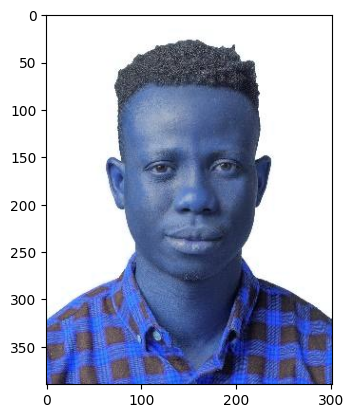

In [139]:


root = '/home/turnyur/sommer-sem-2024/CV/Exercises/'
res_00 = '00/exercise_0_introduction/resources'

file = 'umah.jpeg'  ## path to the image
input_path = os.path.join(root, res_00, file)
img = cv2.imread(input_path, cv2.IMREAD_COLOR)
img_array = np.array(img) 
plt.imshow(img_array, cmap='gray')

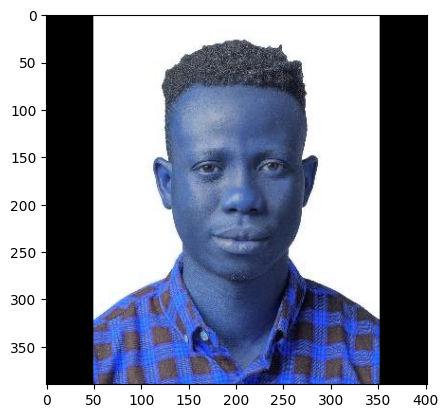

In [140]:
pad_size =50
src_padded = np.pad(img_array, ((0, 0), (pad_size, pad_size), (0, 0)), mode='constant', constant_values=0)
plt.imshow(src_padded)

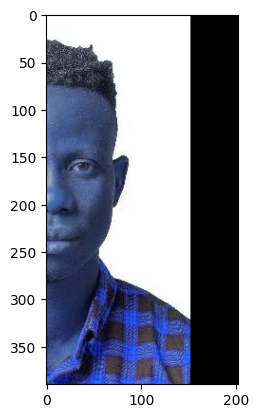

In [141]:
offset =150
src_shifted = src_padded[:, pad_size + offset: pad_size + offset + img_array.shape[1], :]
plt.imshow(src_shifted)

In [142]:
img1 = np.array([ [ [255, 0, 0], [0, 255, 0] ],
  [ [0, 0, 255], [255, 255, 0] ] ])
img2= np.array([ [ [0, 255, 255], [255, 0, 0] ],
  [ [0, 0, 255], [128, 128, 128] ] ])


In [352]:
img2.shape

(2, 2, 3)

In [143]:
np.linalg.norm(img1 - img2, axis=2)

array([[441.67295593, 360.62445841],
       [  0.        , 220.54931421]])

In [144]:
def disparity_map(src: t_img, dst: t_img, offset: int, pad_size: int, sigma_x: int, sigma_z: int,
                  median_filter_size: int) -> t_disparity:
    """Calculates the best/minimum disparity map for a given pair of images.

    Args:
        src: One image taken from a camera, numpy array of shape [H x W x 3].
        dst: Another image with camera only translated, numpy array of shape [H x W x 3].
        offset: An integer value by which the image is shifted.
        pad_size: An integer value to pad the images for computation.
        sigma_x: An integer value for standard deviation in x-direction for Gaussian filter.
        sigma_z: An integer value for standard deviation in z-direction for Gaussian filter.
        median_filter_size: An integer value representing the window size for applying median filter.

    Returns:
        A numpy array of shape [H x W] containing the minimum/best disparity values for a pair of images.
    """

    # Step 1: Construct a stack of all reasonable disparity hypotheses.
    disparity_hypotheses = np.zeros((src.shape[0], src.shape[1], offset + 1))
    
    for d in range(offset + 1):
        disparity_hypotheses[:, :, d] = render_disparity_hypothesis(src, dst, d, pad_size)

    # Step 2: Enforce the coherence between x-axis and disparity-axis using a 3D Gaussian filter.
    # The Gaussian filter smooths the disparity hypotheses across both the pixel positions and disparity values.
    smoothed_hypotheses = gaussian_filter(disparity_hypotheses, sigma=(sigma_x, sigma_x, sigma_z))

    # Step 3: Choose the best disparity hypothesis for every pixel.
    best_disparity_indices = np.argmin(smoothed_hypotheses, axis=2)
    best_disparity_map = best_disparity_indices.astype(np.float32)

    # Step 4: Apply the median filter to enhance local consensus.
    best_disparity_map = median_filter(best_disparity_map, size=median_filter_size)

    return best_disparity_map

In [145]:
disparity_hypotheses = np.zeros((img_array.shape[0], img_array.shape[1], offset + 1))
disparity_hypotheses.shape

(390, 302, 151)

In [146]:
x

array([4, 2, 3])

In [147]:
np.argmin(x)

1

In [148]:
np.argmax(x)

0

In [149]:
xx = np.array([
    [98, 78, 20],
    [45, 8, 90]
])

In [150]:
xx.shape

(2, 3)

In [151]:
np.argmin(xx, axis=1)

array([2, 1])

In [152]:
xx[1,0]

45

In [153]:
xx = np.array([[
    [98, 78, 20],
    [45, 8, 90],
    [6, 8, 90]
], [
    [10, 78, 20],
    [45, 8, -1],
    [-5, 8, 90]
]])

In [154]:
xx.shape

(2, 3, 3)

In [155]:
np.argmin(xx, axis=2)

array([[2, 1, 0],
       [0, 2, 0]])

In [156]:
xx = np.random.randint(0, 256, size=(3, 3, 2), dtype=np.uint8)


In [157]:
xx.shape

(3, 3, 2)

In [158]:
xx

array([[[178, 129],
        [255, 189],
        [130, 171]],

       [[196, 125],
        [232,  60],
        [207,  17]],

       [[192, 182],
        [212, 128],
        [  2,  13]]], dtype=uint8)

In [159]:
img_array.shape

(390, 302, 3)

In [160]:
img_array[0:3,0:3, 0:2]

array([[[255, 255],
        [255, 255],
        [255, 255]],

       [[255, 255],
        [255, 255],
        [255, 255]],

       [[255, 255],
        [255, 255],
        [255, 255]]], dtype=uint8)

In [161]:
xx = np.random.randint(0, 256, size=(3, 3, 2), dtype=np.uint8)
print(xx[:,:, 0], "\n\n", xx[:,:, 1])

[[ 97  55 181]
 [224 137 145]
 [ 38  87 154]] 

 [[ 28 222  72]
 [186 243 254]
 [ 54 100  78]]


In [162]:
xx_min =np.argmin(xx, axis=2)
xx_min

array([[1, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [163]:
offset =18
disparity_values = np.arange(offset + 1)
disparity_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [164]:
disparity_values[xx_min].shape

(3, 3)

In [165]:
import numpy as np

def bilinear_grid_sample(img: t_img, x_array: t_img, y_array: t_img) -> t_img:
    """Sample an image according to a sampling vector field.

    Args:
        img: one image, numpy array of shape [H x W x 3]
        x_array: a numpy array of [H' x W'] representing the x coordinates for src x-direction
        y_array: a numpy array of [H' x W'] representing the y coordinates for interpolation

    Returns:
        An image of size [H' x W'] containing the sampled points.
    """
    
    H, W, C = img.shape
    H_prime, W_prime = x_array.shape
    
    # Step 1: Estimate the left, top, right, bottom integer parts and coefficients
    l = np.floor(x_array).astype(int)  # left
    r = l + 1                           # right
    t = np.floor(y_array).astype(int)  # top
    b = t + 1                           # bottom
    
    a = x_array - l                     # horizontal coefficient
    b = y_array - t                     # vertical coefficient
    
    # Step 2: Take care of out-of-image coordinates
    l = np.clip(l, 0, W - 1)
    r = np.clip(r, 0, W - 1)
    t = np.clip(t, 0, H - 1)
    b = np.clip(b, 0, H - 1)

    # Step 3: Produce a weighted sum of each rounded corner of the pixel
    # Access the pixel values
    Ia = img[t, l] if t < H and l < W else np.zeros((C,))
    Ib = img[b, l] if b < H and l < W else np.zeros((C,))
    Ic = img[t, r] if t < H and r < W else np.zeros((C,))
    Id = img[b, r] if b < H and r < W else np.zeros((C,))
    
    # Weighted sum for each channel
    sampled_img = (1 - a) * (1 - b) * Ia + \
                  (1 - a) * b * Ib + \
                  a * (1 - b) * Ic + \
                  a * b * Id
    
    return sampled_img
